# Vehicles

In [54]:
import pandas as pd
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats.contingency import association
import seaborn as sns

In [55]:
# For visualisation
def cramersv(a, b):
    return association(contingency_matrix(a, b))

In [56]:
df = pd.read_csv('data/vehicles.csv', encoding='latin1')

In [57]:
def fill_with_most_common(df, column_name):
  most_common_value = df[column_name].mode()[0]
  df[column_name].fillna(most_common_value, inplace=True)

In [58]:
df.head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433389 entries, 0 to 1433388
Data columns (total 9 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   Num_Acc  1433389 non-null  int64  
 1   senc     1433317 non-null  float64
 2   catv     1433389 non-null  int64  
 3   occutc   1433389 non-null  int64  
 4   obs      1432627 non-null  float64
 5   obsm     1432788 non-null  float64
 6   choc     1433160 non-null  float64
 7   manv     1433083 non-null  float64
 8   num_veh  1433389 non-null  object 
dtypes: float64(5), int64(3), object(1)
memory usage: 98.4+ MB


In [60]:
df.rename(columns={'senc': 'Flow direction','catv': 'Category', 'obs': 'Fix Obstacle', 'obsm': 'Mobile Obstacle', 'choc': 'Shock', 'manv': 'Maneuver', 'occutc': 'Occupants'}, inplace=True)

## Num_veh

Vehicle identifier included for each user occupying this vehicle (including pedestrians who are attached to the vehicles which struck them) – Alphanumeric code

In [61]:
df['num_veh'].value_counts()

num_veh
A01    829287
B01    387462
B02    128469
C01     42417
Z01     14332
        ...  
A06         1
C07         1
A07         1
B08         1
D56         1
Name: count, Length: 132, dtype: int64

In [62]:
df['num_veh'].isna().sum()

0

## Category


Vehicle category:

- 01 - Bicycle

- 02 - Moped <50cm3

- 03 - Carriage (Quadricycle with body motor) (formerly "motor car or tricycle")

- 04 - Reference no longer used since 2006 (registered scooter)

- 05 - Reference no longer used since 2006 (motorcycle)

- 06 - Reference no longer used since 2006 (sidecar)

- 07 - VL only

- 08 - No longer used category (VL + caravan)

- 09 - No longer used category (VL + trailer)

- 10 - LCV only 1.5T <= GVW <= 3.5T with or without trailer (formerly LCV only 1.5T <= GVW <=3.5T)

- 11 - Reference no longer used since 2006 (UV (10) + caravan)

- 12 - Reference no longer used since 2006 (UV (10) + trailer)

- 13 - PL only 3.5T <PTCA <= 7.5T

- 14 - PL only > 7.5T

- 15 - PL > 3.5T + trailer

- 16 - Road tractor alone

- 17 - Road tractor + semi-trailer

- 18 - Reference no longer used since 2006 (public transport)

- 19 - Reference no longer used since 2006 (tramway)

- 20 - Special machine

- 21 - Agricultural tractor

- 30 - Scooter < 50 cm3

- 31 - Motorcycle > 50 cm3 and <= 125 cm3

- 32 - Scooter > 50 cm3 and <= 125 cm3

- 33 - Motorcycle > 125 cm3

- 34 - Scooter > 125 cm3

- 35 - Light Quad <= 50 cm3 (Quadricycle with unbodied engine)

- 36 - Heavy quad > 50 cm3 (Quadricycle with non-bodied engine)

- 37 - Bus

- 38 - Coach

- 39 - Train

- 40 - Tram

- 99 - Other vehicle (including pedestrian)

In [63]:
df['Category'].value_counts()

Category
7     890217
33     97185
2      79884
10     70205
30     59918
1      58128
32     29596
31     28038
5      21816
14     15392
34     13436
15     11782
17     11501
37      9071
4       7463
99      5441
13      5295
3       5008
21      2762
38      2524
18      2075
36      1624
40      1555
20      1383
16       657
35       367
39       328
9        300
19       183
8        120
12        79
6         39
11        17
Name: count, dtype: int64

In [64]:
df['Category'].isna().sum()

0

#### New shorter categorization

1. Bicycle
  - 01
2. Scooter
  - 04
  - 30
  - 32
  - 34
3. Moped
  - 02
4. Motorcycle
  - 05
  - 06
  - 31
  - 33
5. Tractor
  - 16
  - 17
  - 21
6. Quadricycle
  - 03
  - 35
  - 36
7. Public transport
  - 18
  - 19
  - 37
  - 38
  - 39
  - 40
8. Car
  - 07
  - 08
  - 09
  - 10
  - 11
  - 12
  - 13
  - 14
  - 15
9. Other
  - 20
  - 99


In [65]:
category_mapping = {
    1: 1,  # Bicycle
    2: 2,  # Scooter
    3: 6,  # Quadricycle
    4: 2,  # Scooter
    5: 4,  # Motorcycle
    6: 4,  # Motorcycle
    7: 8,  # Car
    8: 8,  # Car
    9: 8,  # Car
    10: 8,  # Car
    11: 8,  # Car
    12: 8,  # Car
    13: 8,  # Car
    14: 8,  # Car
    15: 8,  # Car
    16: 5,  # Tractor
    17: 5,  # Tractor
    18: 7,  # Public Transport
    19: 7,  # Public Transport
    20: 9,  # Other
    21: 5,  # Tractor
    30: 2,  # Scooter
    31: 4,  # Motorcycle
    32: 2,  # Scooter
    33: 4,  # Motorcycle
    34: 2,  # Scooter
    35: 6,  # Quadricycle
    36: 6,  # Quadricycle
    37: 7,  # Public Transport
    38: 7,  # Public Transport
    39: 7,  # Public Transport
    40: 7,  # Public Transport
    99: 9   # Other
}

df['Vehicle_Category'] = df['Category'].map(category_mapping)
df.drop(['Category'], axis=1, inplace=True)

## Vehicle category

1. Bicycle
2. Scooter
3. Moped
4. Motorcycle
5. Tractor
6. Quadricycle
7. Public transport
8. Car
9. Other

In [66]:
df['Vehicle_Category'].value_counts()

Vehicle_Category
8    993407
2    190297
4    147078
1     58128
7     15736
5     14920
6      6999
9      6824
Name: count, dtype: int64

In [67]:
df['Vehicle_Category'].isna().sum()

0

## Fix Obstacle

Fixed obstacle hit:

  1 – Parked vehicle

  2 – Tree

  3 – Metal slide

  4 – Concrete slide

  5 – Other slide

  6 – Building, wall, bridge pier

  7 – Vertical signaling support or emergency call station

  8 – Post

  9 – Urban furniture

  10 – Parapet

  11 – Island, refuge, upper boundary

  12 – Curbside

  13 – Ditch, embankment, rock wall

  14 – Other fixed obstacle on the roadway

  15 – Other fixed obstacle on sidewalk or shoulder

  16 – Exiting the roadway without obstacles
  

In [68]:
df['Fix Obstacle'].value_counts()

Fix Obstacle
0.0     1248215
1.0       31072
13.0      23630
2.0       20263
4.0       16098
6.0       15635
3.0       15585
8.0       14809
14.0      10407
12.0       7989
16.0       7808
15.0       6497
9.0        4498
11.0       3487
7.0        3006
5.0        1933
10.0       1695
Name: count, dtype: int64

In [69]:
df['Fix Obstacle'].isna().sum()

762

In [70]:
df['Fix Obstacle'].fillna(0, inplace=True)

## Fix obstacle type

#### Mapping

0. Other
  - 0 or null value

1. Stationary Objects:
  - Parked vehicle: 1
  - Tree: 2
  - Building, wall, bridge pier: 6
  - Urban furniture: 9
  - Parapet: 10
  - Island, refuge, upper boundary: 11
  - Curbside: 12
  - Ditch, embankment, rock wall: 13
2. Roadway Infrastructure:
  - Metal slide: 3
  - Concrete slide: 4
  - Other slide: 5
  - Vertical signaling support or emergency call station: 7
  - Post: 8
  - Other fixed obstacle on the roadway: 14
3. Sidewalk/Shoulder Obstacles:
  - Other fixed obstacle on sidewalk or shoulder: 15
4. Exiting the Roadway:
  - Exiting the roadway without obstacles: 16

In [71]:
fix_obstacle_mapping = {
    0: 0,  # Other
    1: 1,  # Parked vehicle
    2: 1,  # Tree
    3: 2,  # Metal slide
    4: 2,  # Concrete slide
    5: 2,  # Other slide
    6: 1,  # Building, wall, bridge pier
    7: 2,  # Vertical signaling support or emergency call station
    8: 1,  # Post
    9: 1,  # Urban furniture
    10: 1,  # Parapet
    11: 1,  # Island, refuge, upper boundary
    12: 1,  # Curbside
    13: 1,  # Ditch, embankment, rock wall
    14: 2,  # Other fixed obstacle on the roadway
    15: 3,  # Other fixed obstacle on sidewalk or shoulder
    16: 4   # Exiting the roadway without obstacles
}

# Map the 'Fix obstacle' column to the 'Fix_obstacle_type' column
df['Fix_obstacle_type'] = df['Fix Obstacle'].map(fix_obstacle_mapping)
df.drop(['Fix Obstacle'], axis=1, inplace=True)

New categories:

0. Other
1. Stationary Objects
2. Roadway Infrastructure
3. Sidewalk/Shoulder Obstacles
4. Exiting the Roadway

In [72]:
df['Fix_obstacle_type'].value_counts()

Fix_obstacle_type
0    1248977
1     123078
2      47029
4       7808
3       6497
Name: count, dtype: int64

In [73]:
df['Fix_obstacle_type'].isna().sum()

0

## Mobile Obstacle

Moving obstacle struck:

  1 – Pedestrian

  2 – Vehicle

  4 – Rail vehicle

  5 – Pet

  6 – Wild animal

9 – Other

In [74]:
df['Mobile Obstacle'].value_counts()

Mobile Obstacle
2.0    949636
0.0    312044
1.0    146011
9.0     20461
6.0      1954
5.0      1357
4.0      1325
Name: count, dtype: int64

In [75]:
df['Mobile Obstacle'].isna().sum()

601

In [76]:
df['Mobile Obstacle'].fillna(0, inplace=True)

## Shock

Initial shock point:

  1 - Before

  2 – Front right

  3 – Front left

  4 – Back

  5 – Right back

  6 – Left rear

  7 – Right side

  8 – Left side
  
  9 – Multiple impacts (rollovers)

In [77]:
df['Shock'].value_counts()

Shock
1.0    531553
3.0    204636
2.0    165642
4.0    132518
8.0    105565
0.0     97717
7.0     88074
6.0     47388
5.0     37260
9.0     22807
Name: count, dtype: int64

In [78]:
df['Shock'].isna().sum()

229

In [79]:
df['Shock'].fillna(0, inplace=True)

## Maneuver

Main maneuver before the accident:

-  1 – Without change of direction

-   2 – Same direction, same line

-   3 – Between 2 lines

-   4 – In reverse

-   5 – Against the grain

-   6 – Crossing the central reservation

-   7 – In the bus lane, in the same direction

-   8 – In the bus lane, in the opposite direction

-   9 – By inserting yourself

-   10 – When making a U-turn on the road

Changing lanes

- 11 – Left

- 12 – Right

Deported

- 13 – Left

- 14 – Right

Turning point

- 15 – Left

- 16 – Right

Exceeding

- 17 – Left

- 18 – Right

Miscellaneous

- 19 – Crossing the road

- 20 – Parking maneuver

- 21 – Avoidance maneuver

- 22 – Door opening

- 23 – Stopped (excluding parking)

- 24 – Parked (with occupants)

In [80]:
df['Maneuver'].value_counts()

Maneuver
1.0     631200
2.0     163463
15.0    127031
0.0     118546
13.0     59922
17.0     48701
23.0     37726
16.0     32035
9.0      31288
19.0     27750
14.0     22580
21.0     22064
11.0     15165
5.0      14740
10.0     13782
12.0     12765
4.0      12749
3.0       9673
18.0      6984
20.0      6674
7.0       5160
24.0      5048
22.0      4207
6.0       3097
8.0        733
Name: count, dtype: int64

In [81]:
df['Maneuver'].isna().sum()

306

In [82]:
df['Maneuver'].fillna(0, inplace=True)

#### New mapping

0. Other
1. Main maneuver before the accident
2. Changing lanes
3. Deported
4. Turning point
5. Exceeding
6. Miscellaneous

In [83]:
def map_maneuver_to_category(maneuver):
    main_maneuvers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    changing_lanes = [11, 12]
    deported = [13, 14]
    turning_point = [15, 16]
    exceeding = [17, 18]
    miscellaneous = [19, 20, 21, 22, 23, 24]

    if maneuver in main_maneuvers:
        return 1  # Main maneuver before the accident
    elif maneuver in changing_lanes:
        return 2  # Changing lanes
    elif maneuver in deported:
        return 3  # Deported
    elif maneuver in turning_point:
        return 4  # Turning point
    elif maneuver in exceeding:
        return 5  # Exceeding
    elif maneuver in miscellaneous:
        return 6  # Miscellaneous
    else:
        return 0  # Unknown or unassigned maneuver category

df['Maneuver_category'] = df['Maneuver'].apply(map_maneuver_to_category)
df.drop(['Maneuver'], axis=1, inplace=True)

In [84]:
df['Maneuver_category'].value_counts()

Maneuver_category
1    885885
4    159066
0    118852
6    103469
3     82502
5     55685
2     27930
Name: count, dtype: int64

In [85]:
df['Maneuver_category'].isna().sum()

0

## Occupants

Number of occupants on public transport

In [86]:
df['Occupants'].value_counts()

Occupants
0      1423666
1         4770
2          696
10         554
3          359
        ...   
184          1
153          1
240          1
125          1
470          1
Name: count, Length: 114, dtype: int64

In [87]:
df['Occupants'].isna().sum()

0

#### New categorization

1. Not a public transport
2. Below 5
3. Between 5 and 10
4. Between 10 and 20
5. 20 or more

In [88]:
def map_occupants(occupants):
    if occupants == 0:
        return 1  # Not a public transport
    elif occupants < 5:
        return 2  # Below 5
    elif 5 <= occupants < 10:
        return 3  # Between 5 and 10
    elif 10 <= occupants < 20:
        return 4  # Between 10 and 20
    else:
        return 5  # 20 or more

df['Occupants'] = df['Occupants'].apply(map_occupants)

In [89]:
df['Occupants'].value_counts()

Occupants
1    1423666
2       6018
5       1951
4       1197
3        557
Name: count, dtype: int64

In [90]:
df['Occupants'].isna().sum()

0

## Flow direction

Flow direction :

  1 – PK or PR or ascending postal address number

  2 – PK or PR or decreasing postal address number
  

In [91]:
df['Flow direction'].value_counts()

Flow direction
0.0    1322803
1.0      74935
2.0      35579
Name: count, dtype: int64

In [92]:
df['Flow direction'].isna().sum()

72

In [93]:
df.drop('Flow direction', axis=1, inplace=True)

# Result

In [94]:
df.columns

Index(['Num_Acc', 'Occupants', 'Mobile Obstacle', 'Shock', 'num_veh',
       'Vehicle_Category', 'Fix_obstacle_type', 'Maneuver_category'],
      dtype='object')

In [95]:
df.to_csv('data/vehicles_prepped.csv', index=False)

### Correlation

In [96]:
cols = list(df.columns)
cols.remove("Num_Acc")
cols.remove("num_veh")

<Axes: >

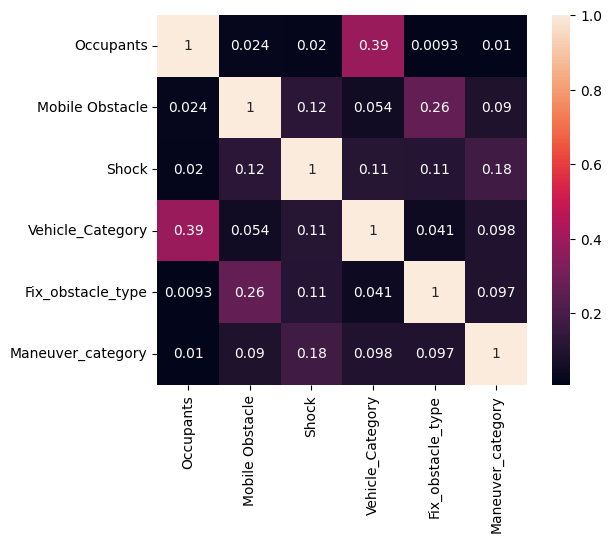

In [97]:
corr = df[cols].corr(method=cramersv, numeric_only=False)
sns.heatmap(corr, square=True, annot=True)

# Notes

Bad news

- **Flow direction:** should be thrown out. 92% of this data is null, and not sure what we can use it for in the first place

General

- Occupants: 99% zero, because only filled out when a public transport is involved (have to be checked if this few public transport accidents are, or if they just don't fill it in)

Question

- Mobile Obstacle: There is an "9 - other" code and a lot of invalid "0" codes. Should we fill the 0-s with 9-s?

In [ ]:
1322803/1433389

0.922849973035931

In [ ]:
1423666/1433389

0.9932167750694334